In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from sympy import inverse_laplace_transform
%matplotlib inline

In [2]:
L = 18.16e-3
R = 50
R_g = 50
r = 0.46
C = 2.2e-6

6004.03828516922*exp(-2765.96916299559*t)*sin(4168.86682836108*t)*Heaviside(t)


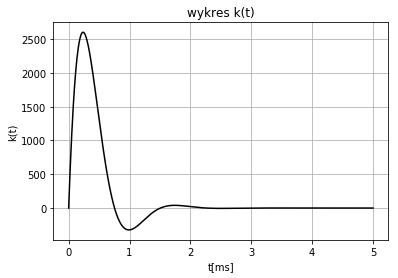

In [3]:
s, t = sp.symbols('s, t')
k_s = 1/(1+s*C*(R+R_g+r)+L*C*s**2)
k_t = inverse_laplace_transform(k_s,s,t)
print(k_t)
t = np.linspace(0,5e-3,1000)
def k_t(t):
    return 6004.04*np.exp(-2765.97*t)*np.sin(4168.87*t)
plt.plot(t*1e3,k_t(t),'k')
plt.xlabel("t[ms]")
plt.ylabel("k(t)")
plt.grid()
plt.title('wykres k(t)')
plt.savefig("kt.png",dpi=400)

In [ ]:
s, t = sp.symbols('s, t')
h_s = 1/((1+s*C*(R+R_g+r)+L*C*s**2)*s)
h_t = inverse_laplace_transform(h_s,s,t)
print(h_t)
# t = np.linspace(0,5e-3,1000)
# def h_t(t):
#     return 6004.04*np.exp(-2765.97*t)*np.sin(4168.87*t)
# plt.plot(t*1e3,k_t(t),'k')
# plt.xlabel("t[ms]")
# plt.ylabel("k(t)")
# plt.grid()